# **Fixed fraction of neutral agents - evolution of the system**

This notebook corresponds to the section where we **introduce a fixed fraction of neutral agents** into our spin system simulation. The goal is to analyze the impact of these neutral agents on the system's dynamics.


## I. Basic imports and setup

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from numpy import empty, nan, savetxt
import random

from source.neutralspinsystem_fixed import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list


In [2]:
#fix the seed
SEED = 42
random.seed(SEED)       
np.random.seed(SEED) 

MAX_FILE_SIZE = 100_000

# parameters
config_filename = "multising.conf"
config = read_config_file(config_filename)

grid_height = int(config["grid_height"])
grid_width  = int(config["grid_width"])
alpha       = float(config["alpha"])
j           = float(config["j"])
total_updates = int(config["total_updates"])
init_up     = float(config["init_up"])
T           = float(config["T"])
beta        = 1/T

reduced_alpha              = -2 * beta * alpha
reduced_neighbour_coupling = -2 * beta * j

magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
magnetisation[:] = nan

In [3]:
# initiate the system

spin_system = SpinSystem(
    grid_height=grid_height,
    grid_width=grid_width,
    init_up=init_up,
    fraction_neutral=0.8,  
    region_neutral="top_left"
)

## II. Experiments

### A. Neutral agents concentrated in top left corner (part of neutrals : 80%)

In [4]:
full_grids = []
full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))


for ii in range(total_updates):
    # update
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

    if ii > 0 and (ii % MAX_FILE_SIZE == 0):
        savetxt(f"magnetisation_{ii}.dat", magnetisation)
        magnetisation[:] = nan

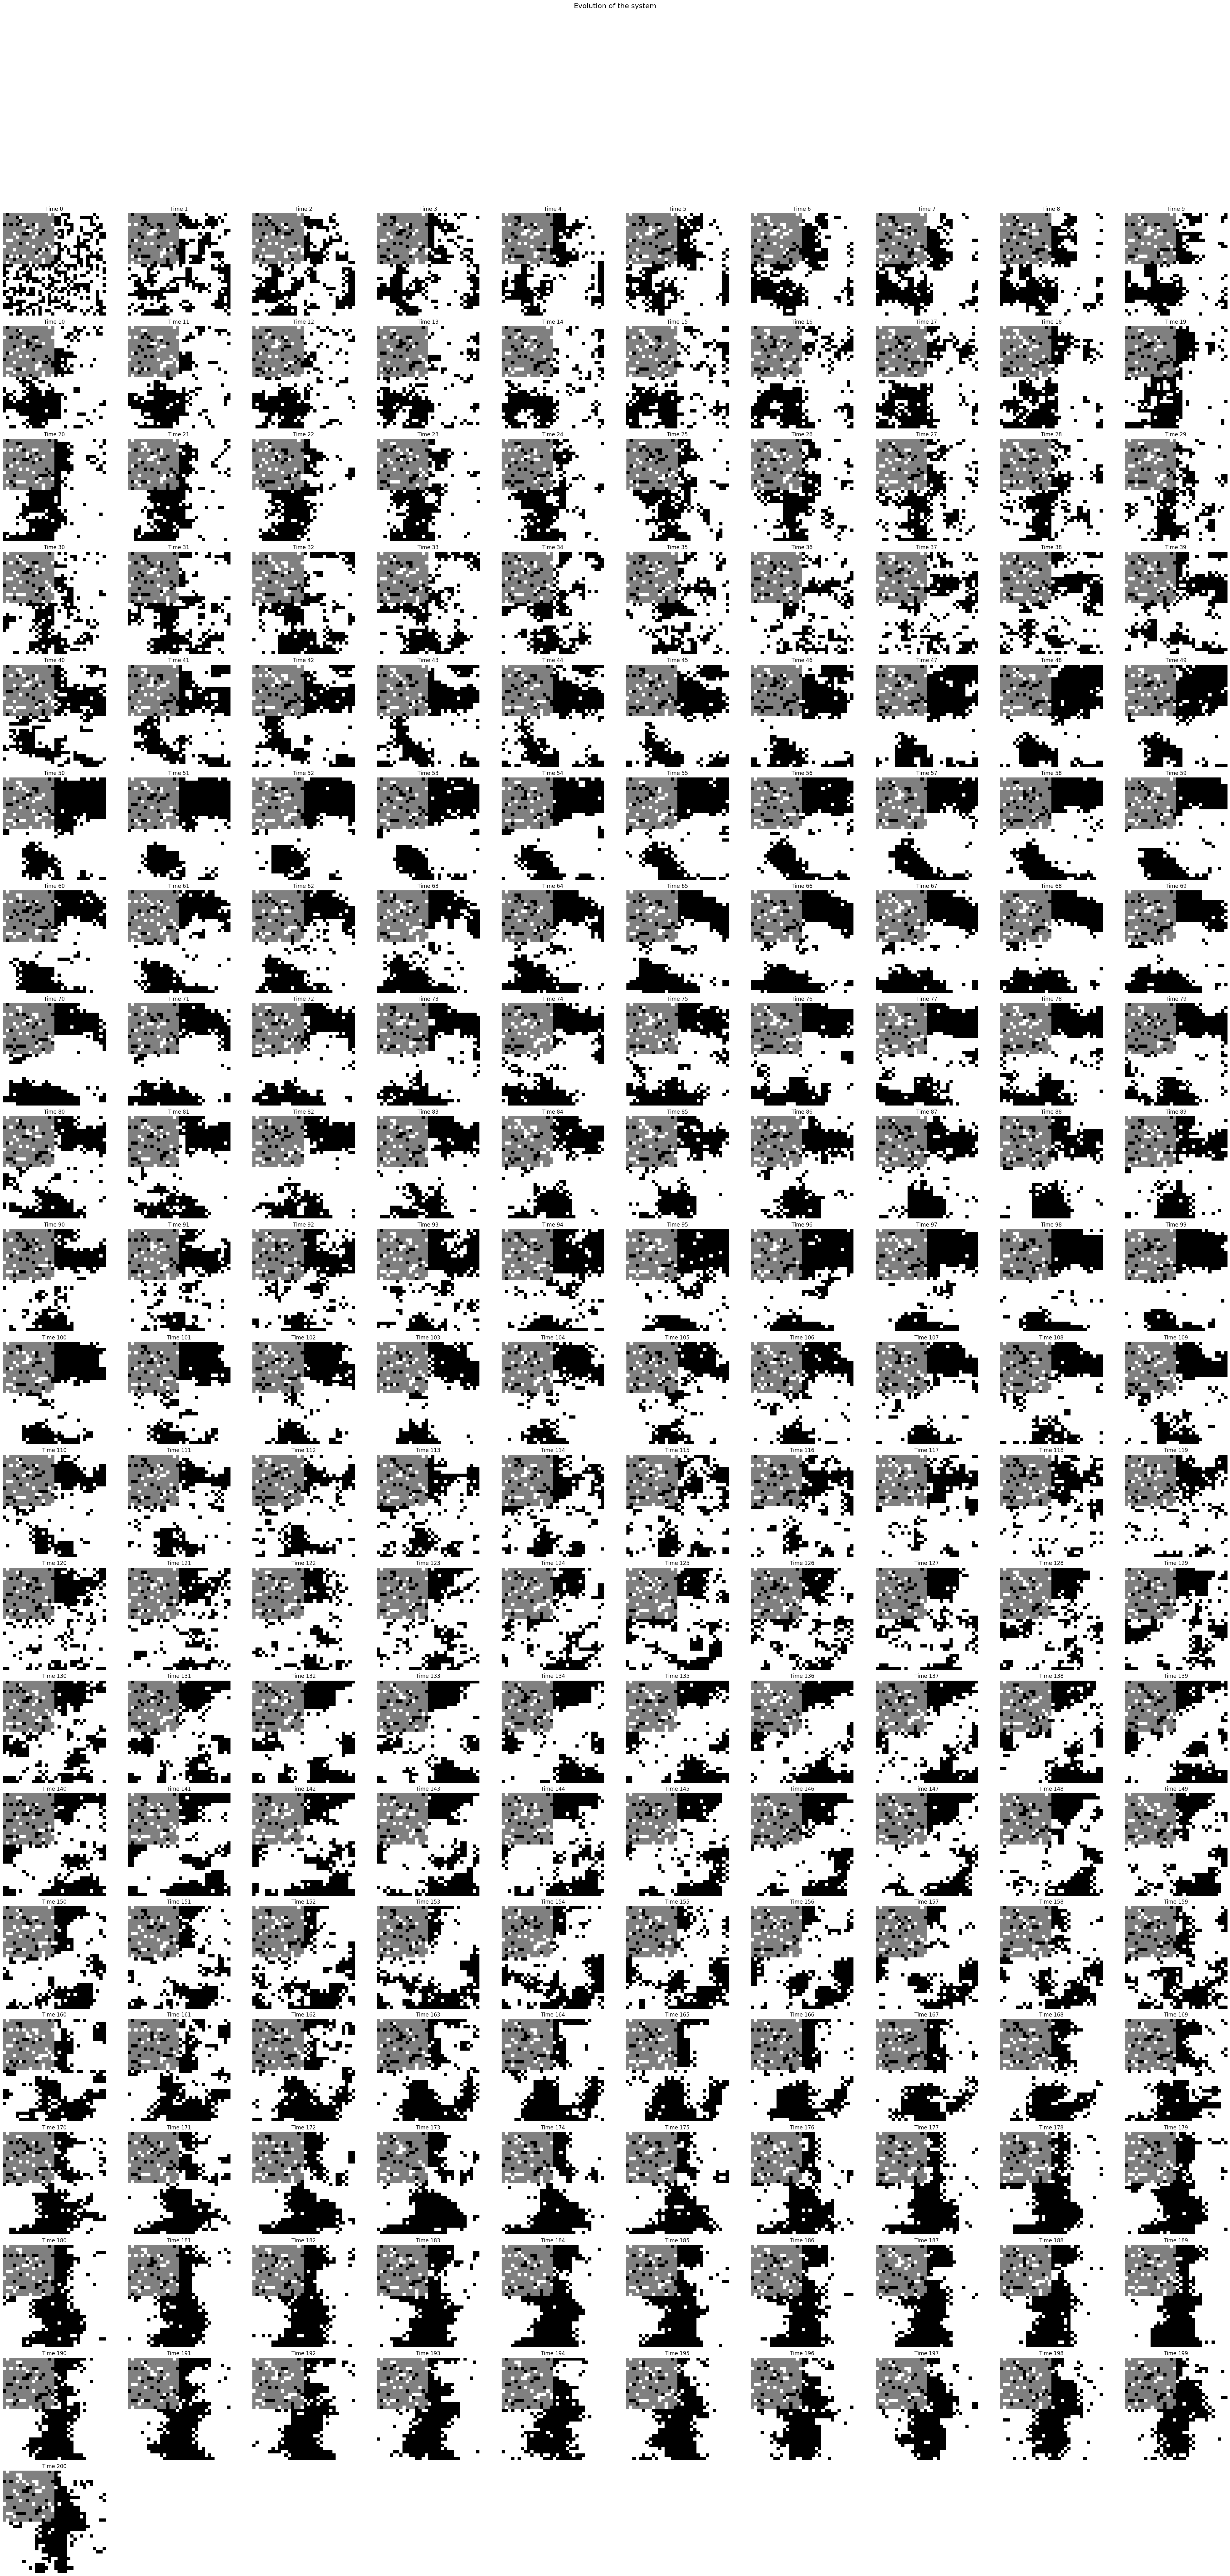

In [5]:
plot_array_list(full_grids, max_cols=10)

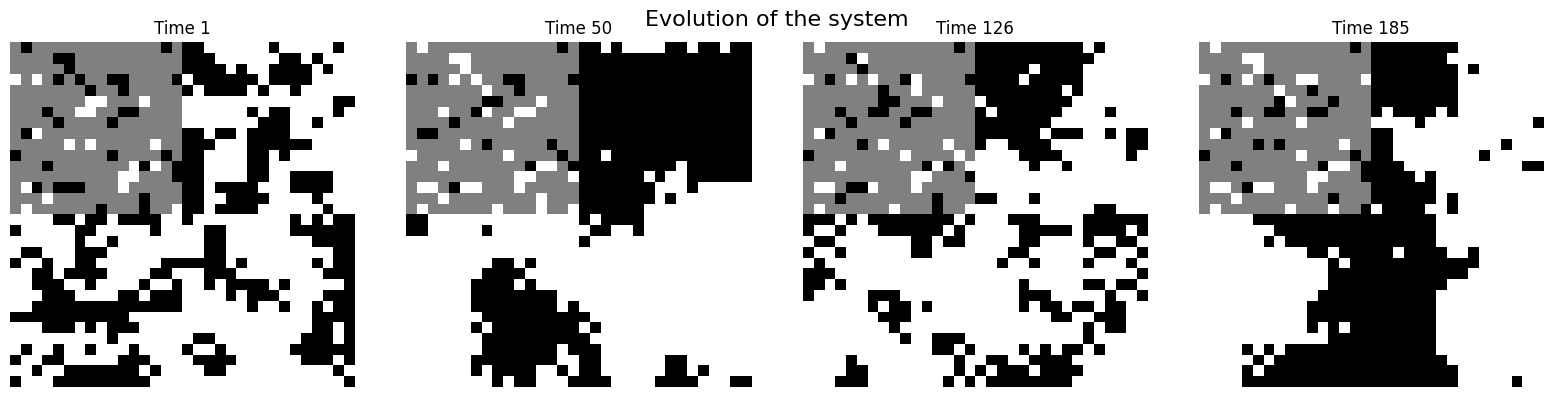

In [6]:
#0.8
plot_array_list(np.array([full_grids[1], full_grids[50], full_grids[126], full_grids[185]]), max_cols=5, timesteps=[1,50,126,185])

### B. Neutral agents concentrated in bottom left corner (part of neutrals : 30%)

In [7]:
SEED = 42
random.seed(SEED)       
np.random.seed(SEED)  

spin_system = SpinSystem(
    grid_height=grid_height,
    grid_width=grid_width,
    init_up=init_up,
    fraction_neutral=0.3,  
    region_neutral="bottom_left"
)

In [8]:
full_grids = []
full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(total_updates):
    # update
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

    if ii > 0 and (ii % MAX_FILE_SIZE == 0):
        savetxt(f"magnetisation_{ii}.dat", magnetisation)
        magnetisation[:] = nan

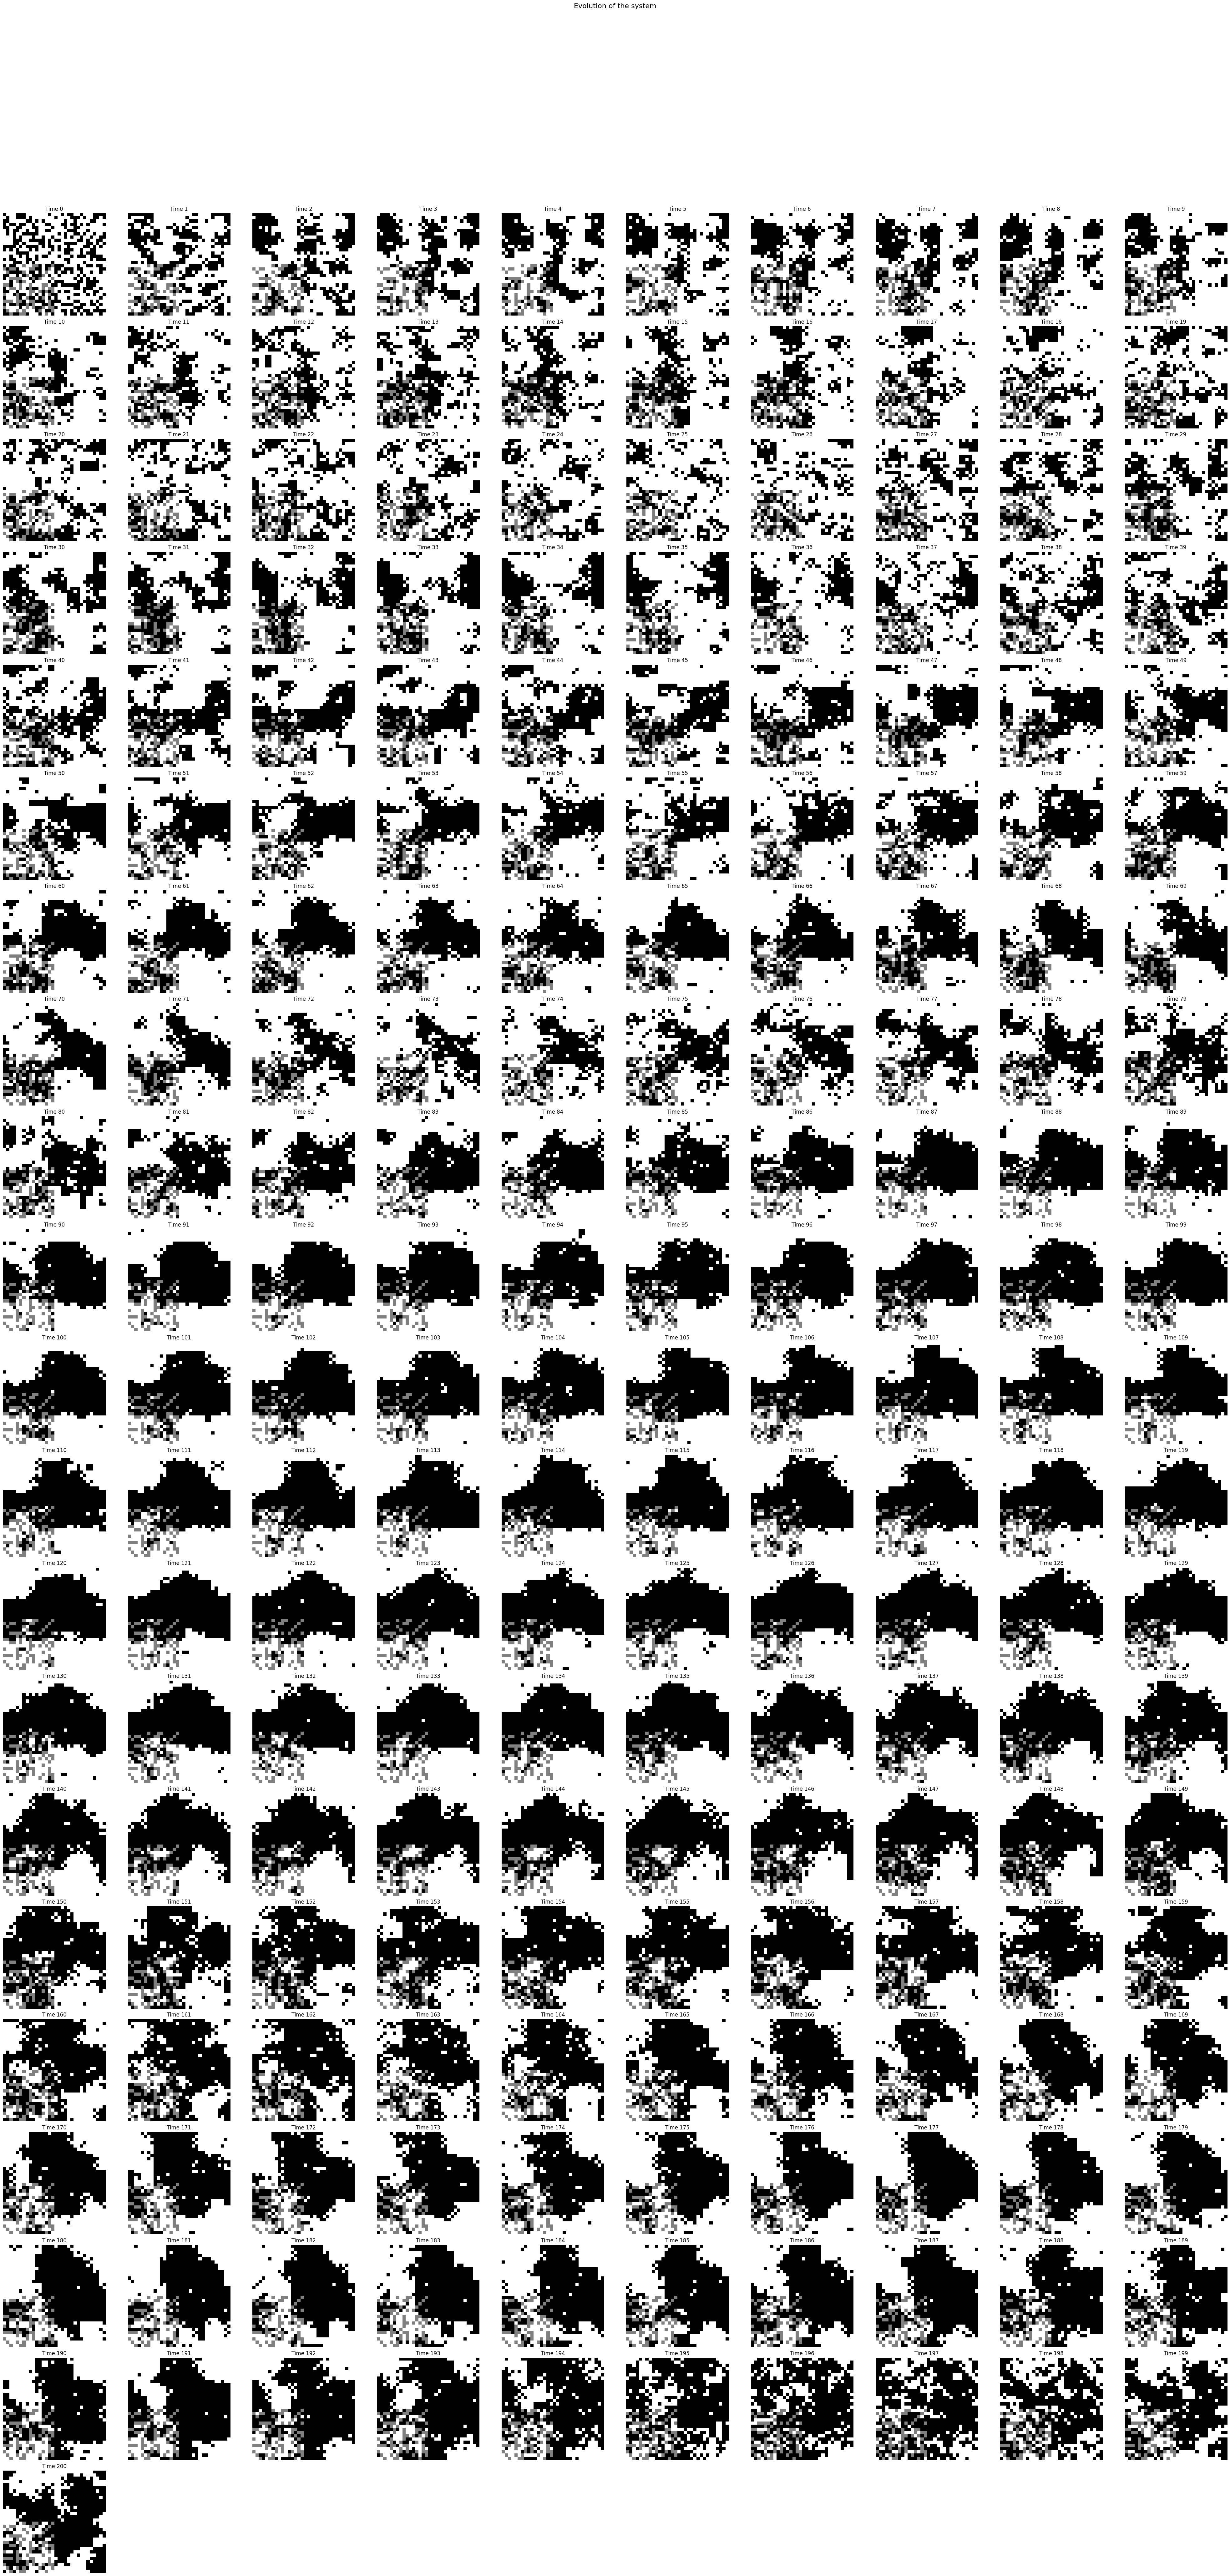

In [9]:
plot_array_list(full_grids, max_cols=10)

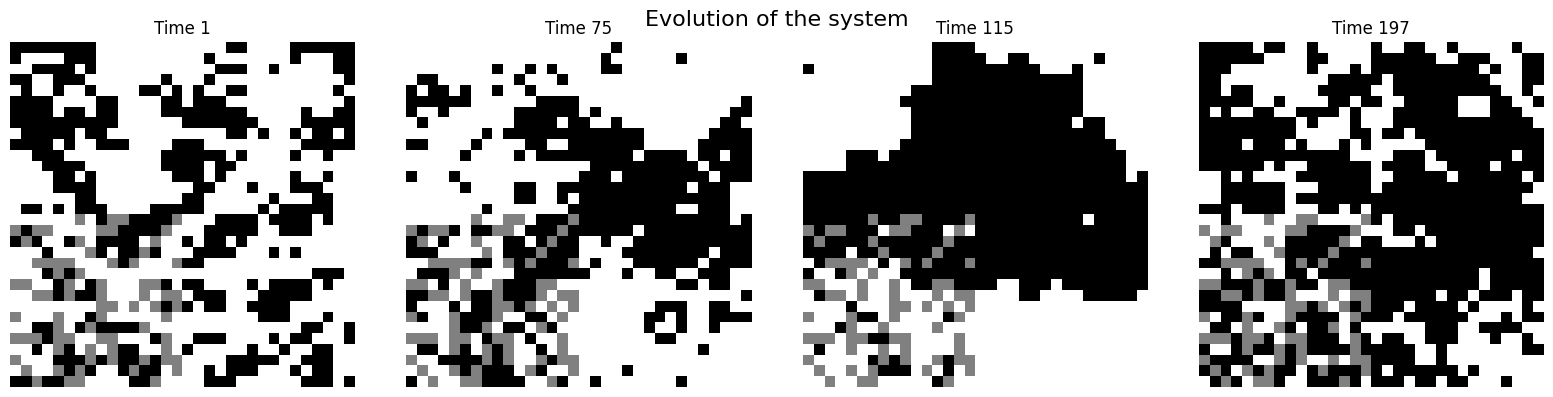

In [10]:
plot_array_list(np.array([full_grids[1], full_grids[75], full_grids[115], full_grids[197]]), max_cols=5, timesteps=[1,75,115,197])

### C. Neutral agents randomly distributed over the grid (part of neutrals : 40%)

In [11]:
SEED = 42
random.seed(SEED)       
np.random.seed(SEED)  

spin_system = SpinSystem(
    grid_height=grid_height,
    grid_width=grid_width,
    init_up=init_up,
    fraction_neutral=0.4,  
    region_neutral="random"
)

In [12]:
full_grids = []
full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(total_updates):
    # update
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

    if ii > 0 and (ii % MAX_FILE_SIZE == 0):
        savetxt(f"magnetisation_{ii}.dat", magnetisation)
        magnetisation[:] = nan

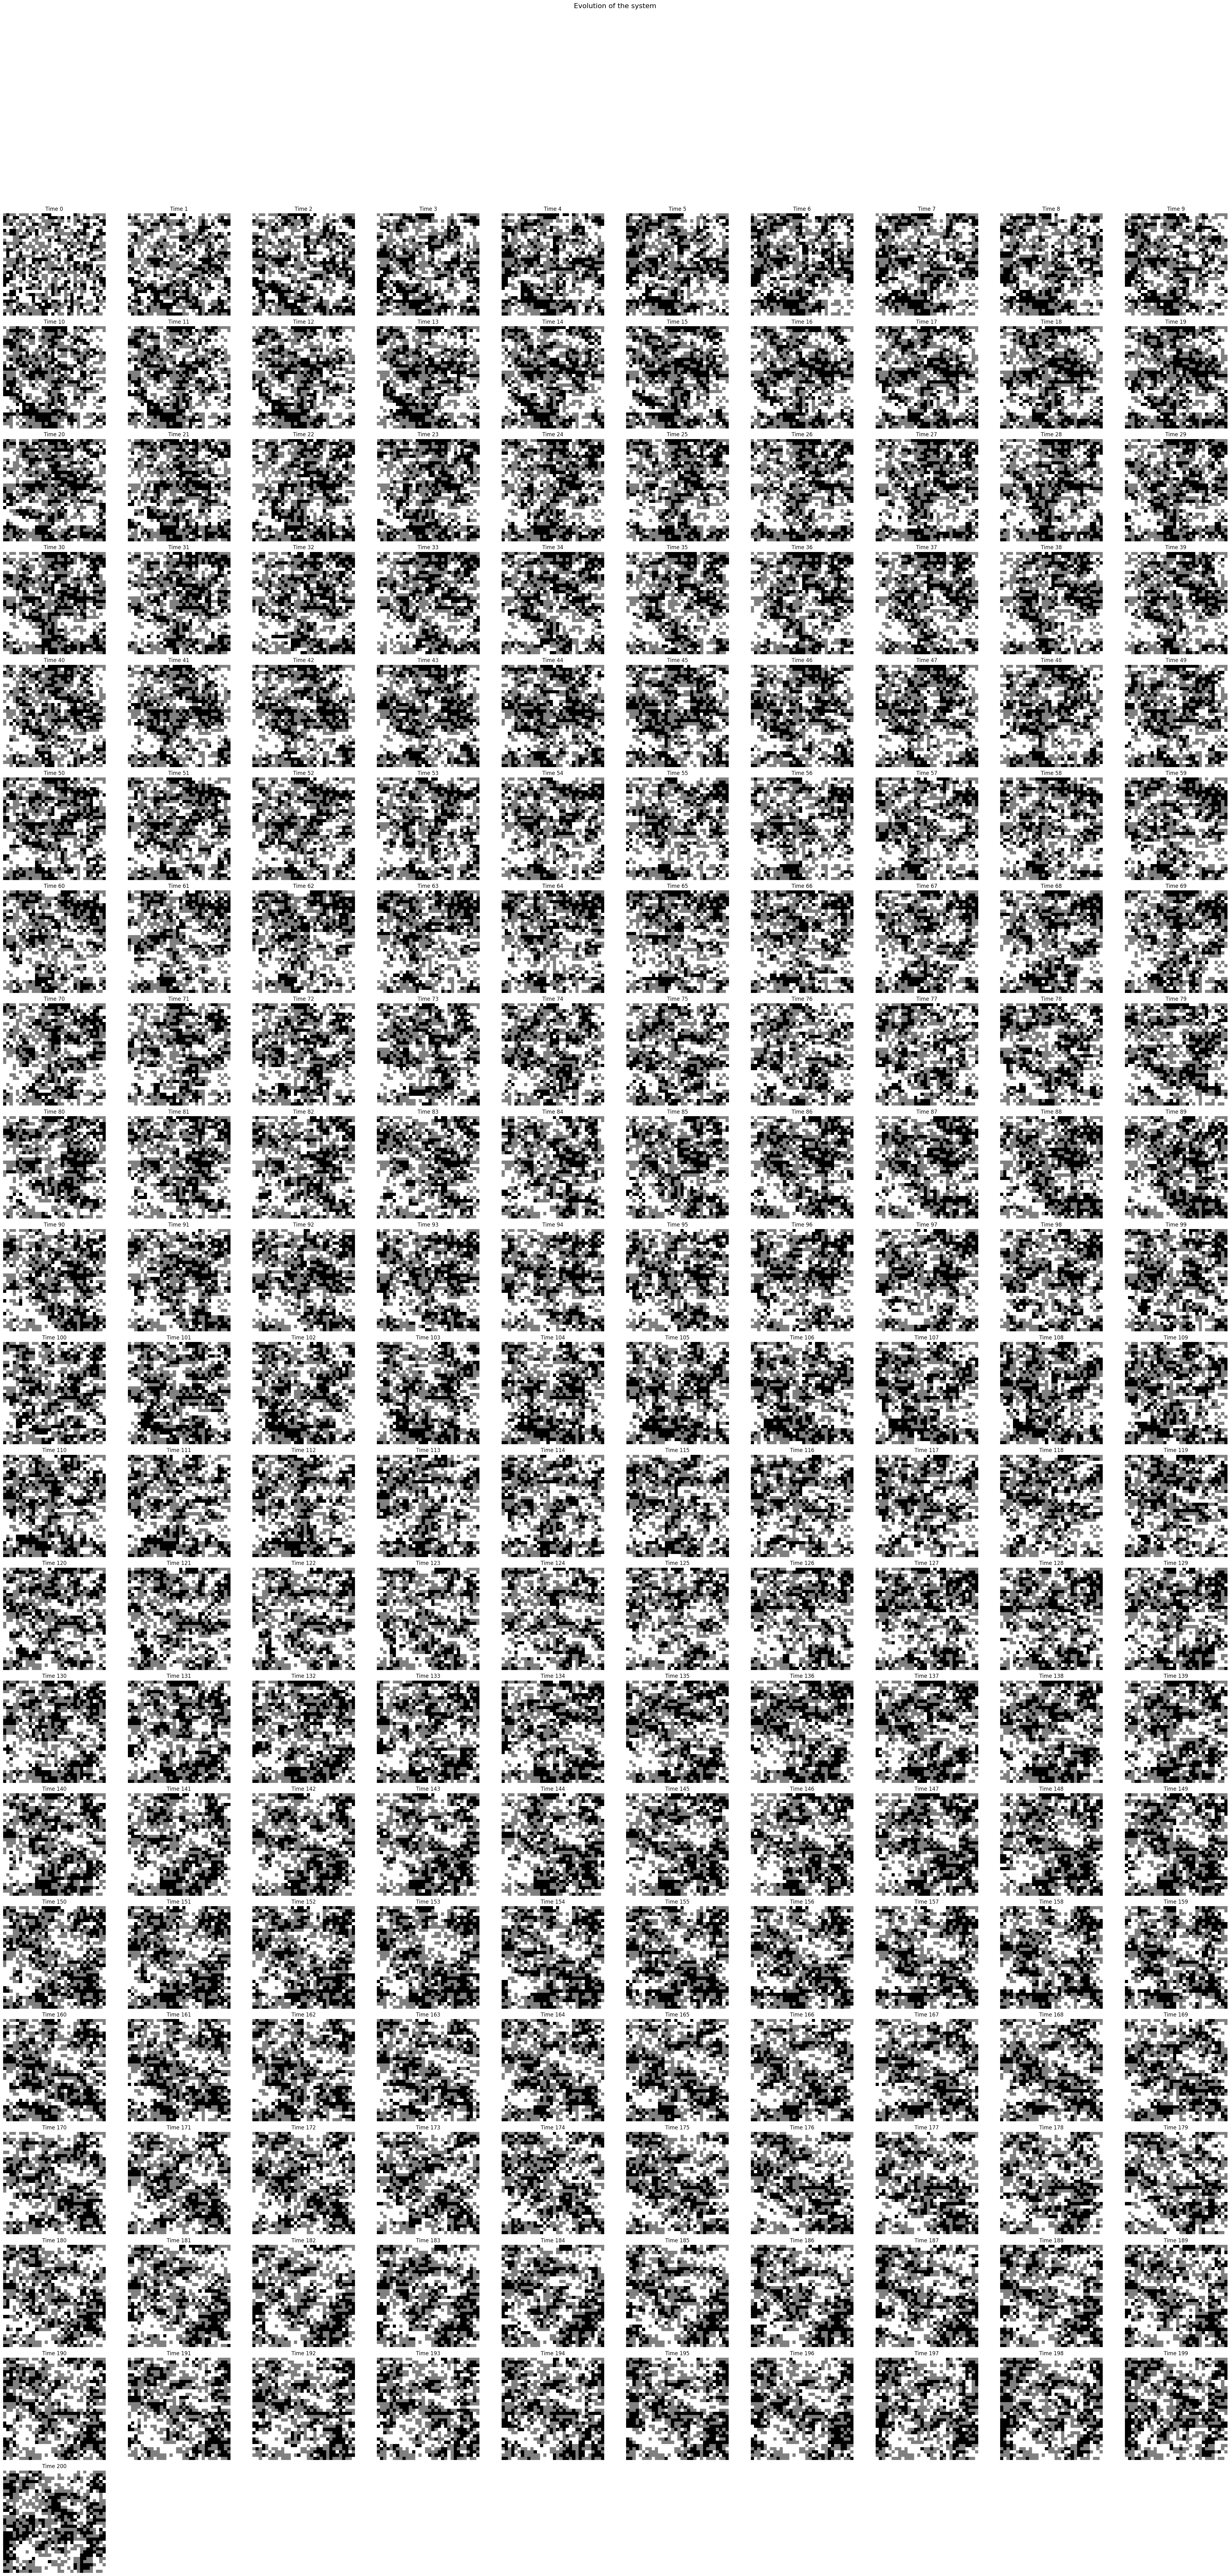

In [13]:
plot_array_list(full_grids, max_cols=10)

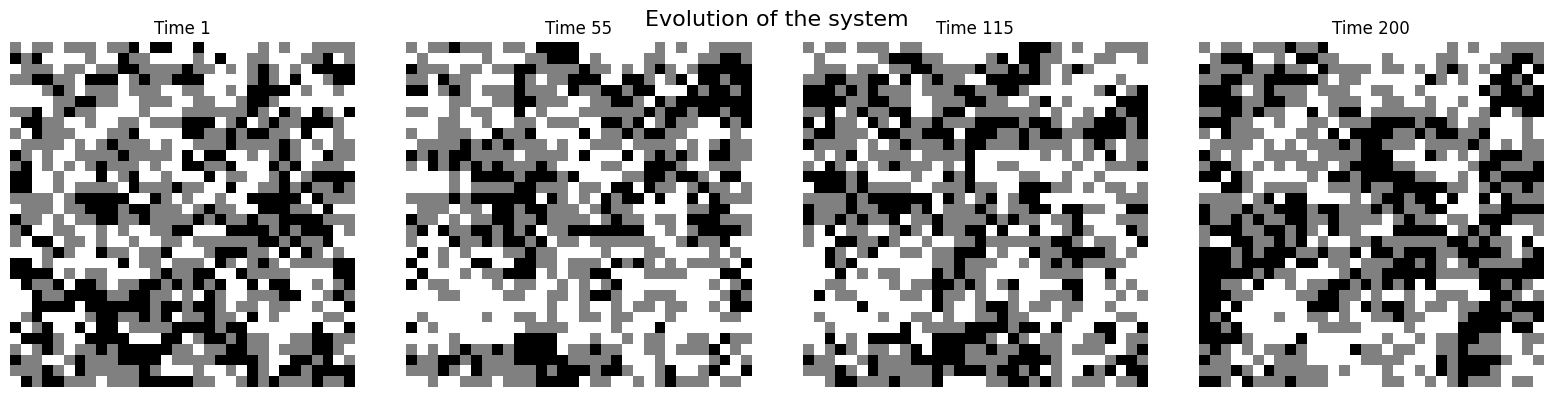

In [14]:
plot_array_list(np.array([full_grids[1], full_grids[55], full_grids[115], full_grids[200]]), max_cols=5, timesteps=[1,55,115,200])

### D. Neutral agents concentrated in top left corner (part of neutrals : 80%)

In [15]:
SEED = 42
random.seed(SEED)       
np.random.seed(SEED)  

spin_system = SpinSystem(
    grid_height=grid_height,
    grid_width=grid_width,
    init_up=init_up,
    fraction_neutral=0.1,  
    region_neutral="random"
)

In [16]:
full_grids = []
full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(total_updates):
    # update
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

    if ii > 0 and (ii % MAX_FILE_SIZE == 0):
        savetxt(f"magnetisation_{ii}.dat", magnetisation)
        magnetisation[:] = nan

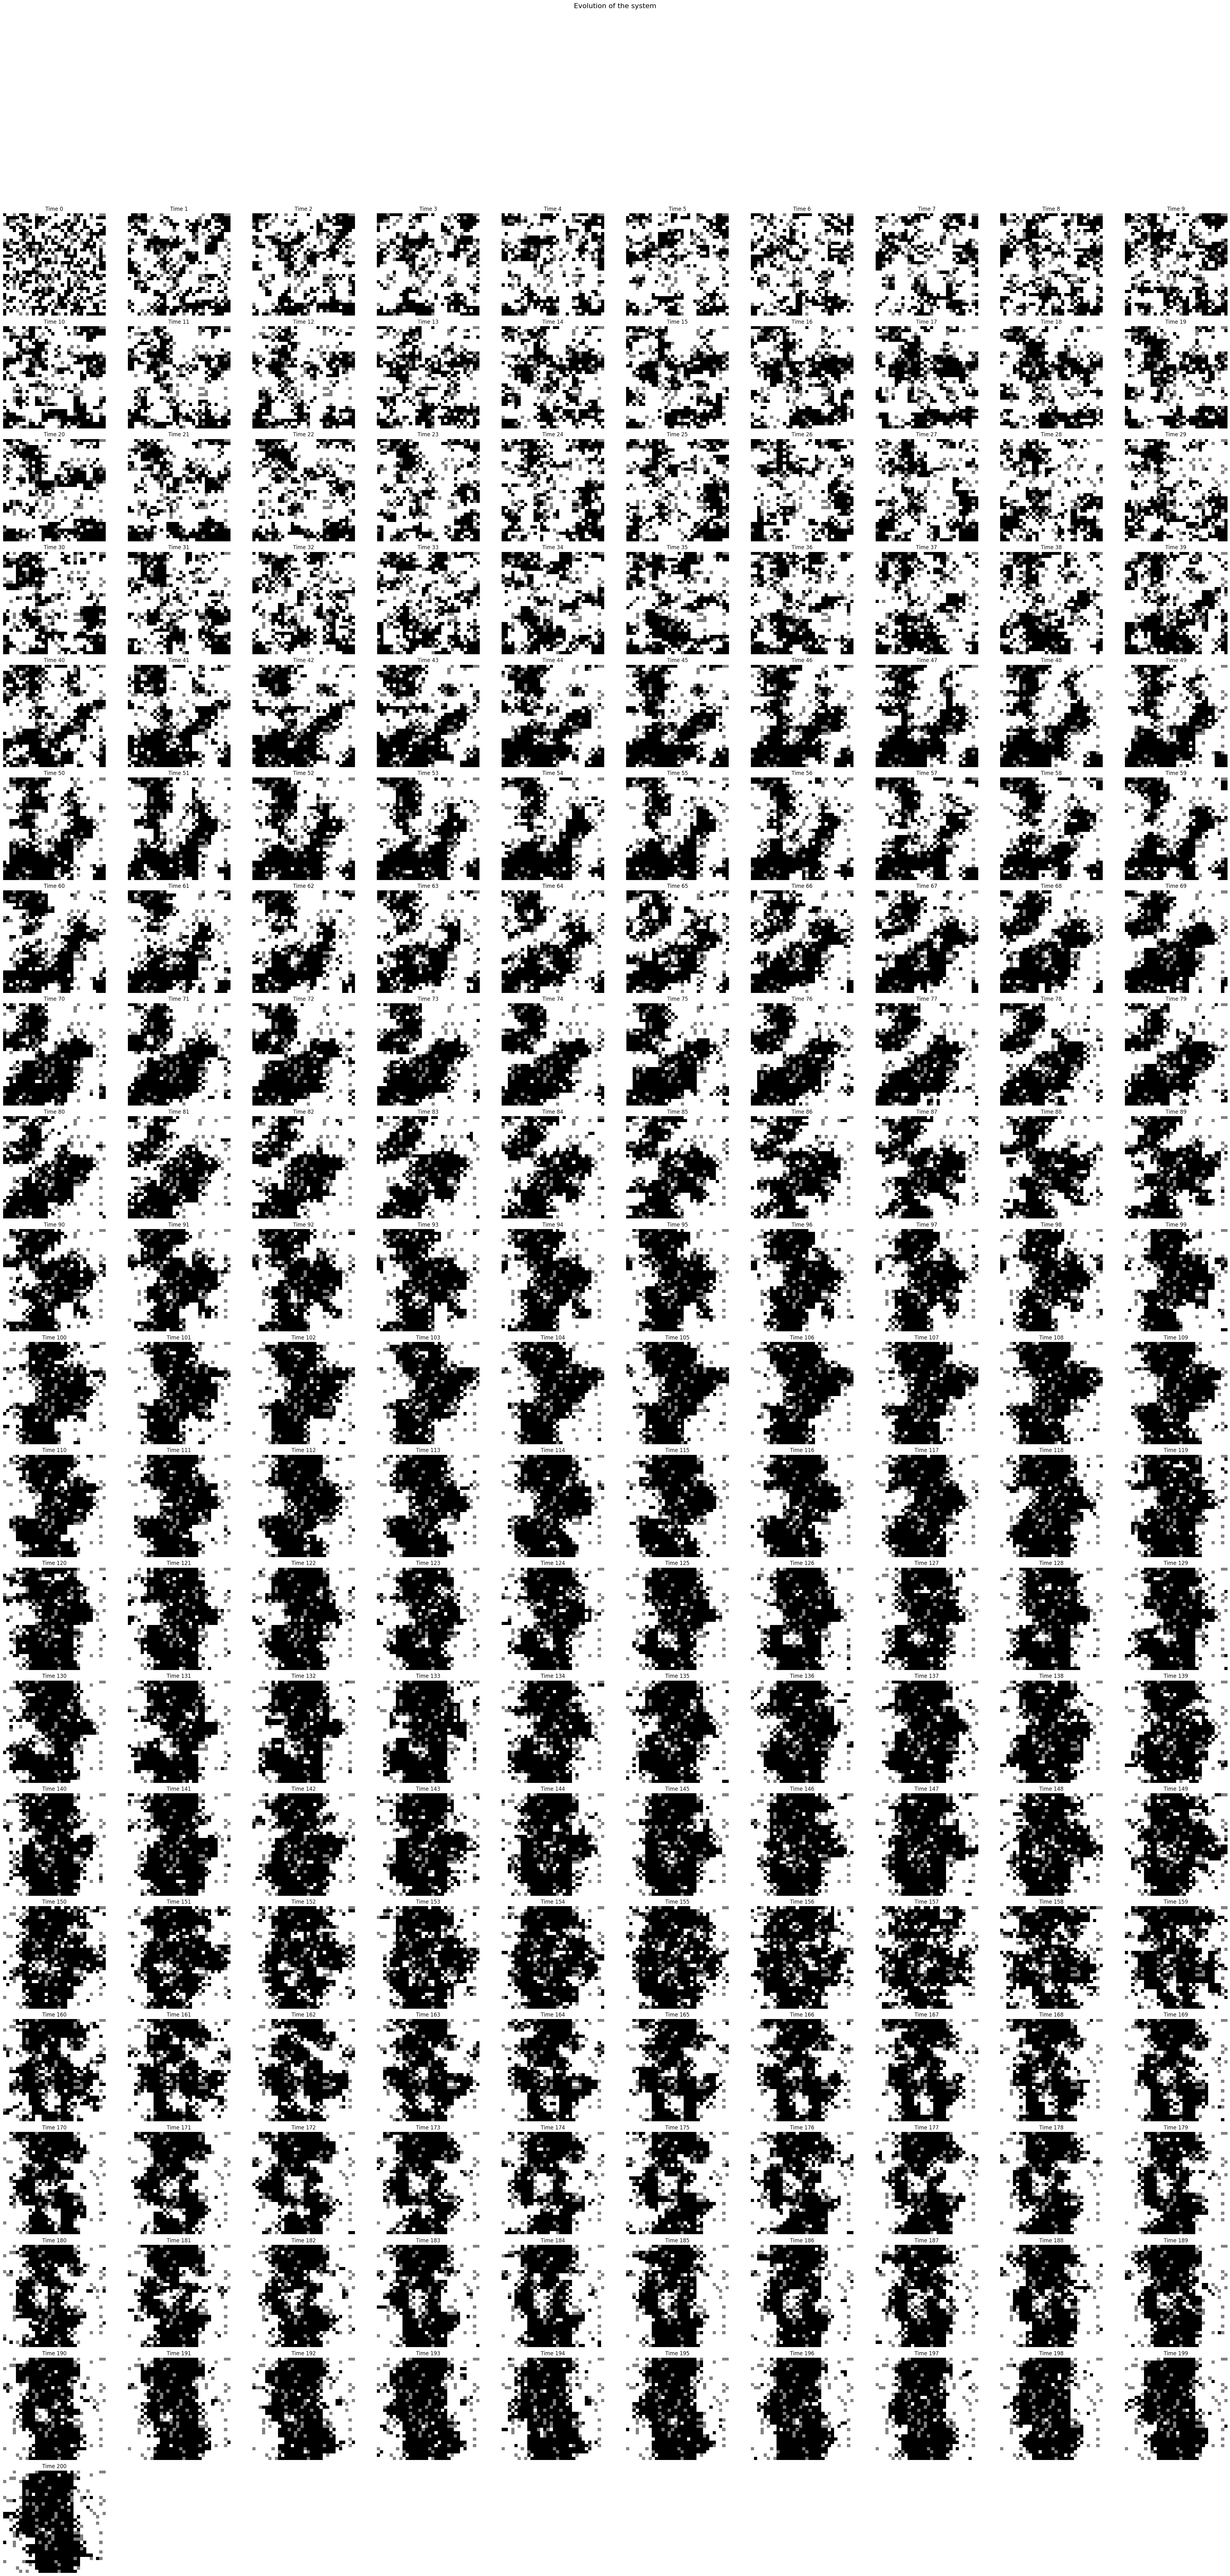

In [17]:
plot_array_list(full_grids, max_cols=10)

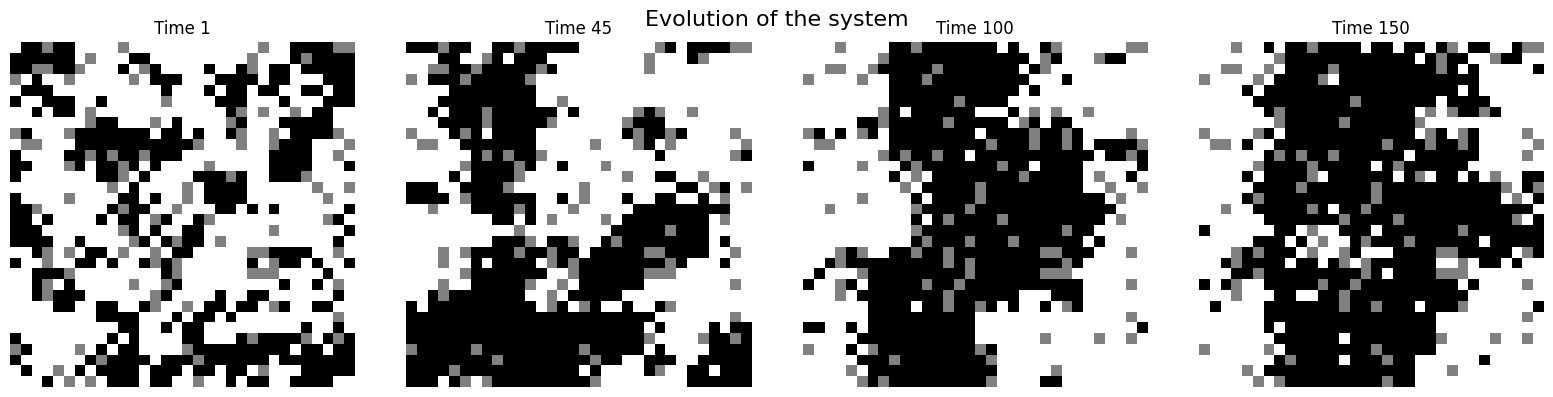

In [18]:
plot_array_list(np.array([full_grids[1], full_grids[45], full_grids[100], full_grids[150]]), max_cols=5, timesteps=[1,45,100,150])